In [2]:
import numpy as np
import pandas as pd

In [3]:
# Linear
class phi_1_1:
    def __init__(self):
        pass

    def compute(self,t):
        return (1 - t) / 2


class phi_1_2:
    def __init__(self):
        pass

    def compute(self,t):
        return (1 + t) / 2


# Quadrática
class phi_2_1:
    def __init__(self):
        pass

    def compute(self,t):
        return (t - 1) * t / 2


class phi_2_2:
    def __init__(self):
        pass

    def compute(self,t):
        return (t + 1) * (1 - t)


class phi_2_3:
    def __init__(self):
        pass

    def compute(self,t):
        return (t + 1) * t / 2


# Cúbica
class phi_3_1:
    def __init__(self):
        pass

    def compute(self,t):
        return (-9 / 16) * (t + 1 / 3) * (t - 1 / 3) * (t - 1)


class phi_3_2:
    def __init__(self):
        pass

    def compute(self,t):
        return (27 / 16) * (t + 1) * (t - 1 / 3) * (t - 1)


class phi_3_3:
    def __init__(self):
        pass

    def compute(self,t):
        return (-27 / 16) * (t + 1) * (t + 1 / 3) * (t - 1)


class phi_3_4:
    def __init__(self):
        pass

    def compute(self,t):
        return (9 / 16) * (t + 1) * (t + 1 / 3) * (t - 1 / 3)


# Quaternária
class phi_4_1:
    def __init__(self):
        pass

    def compute(self,t):
        return (2 / 3) * (t + 1 / 2) * t * (t - 1 / 2) * (t - 1)


class phi_4_2:
    def __init__(self):
        pass

    def compute(self,t):
        return (-8 / 3) * (t + 1) * t * (t - 1 / 2) * (t - 1)


class phi_4_3:
    def __init__(self):
        pass

    def compute(self,t):
        return 4 * (t + 1) * (t + 1 / 2) * (t - 1 / 2) * (t - 1)


class phi_4_4:
    def __init__(self):
        pass

    def compute(self,t):
        return (-8 / 3) * (t + 1) * (t + 1 / 2) * t * (t - 1)


class phi_4_5:
    def __init__(self):
        pass

    def compute(self,t):
        return (2 / 3) * (t + 1) * (t + 1 / 2) * t * (t - 1 / 2)

In [4]:
def func_base_init(k):
    dict_phi = {}
    if k==1:
        dict_phi[1] = phi_1_1()
        dict_phi[2] = phi_1_2()

    elif k==2:
        dict_phi[1] = phi_2_1()
        dict_phi[2] = phi_2_2()
        dict_phi[3] = phi_2_3()

    elif k==3:
        dict_phi[1] = phi_3_1()
        dict_phi[2] = phi_3_2()
        dict_phi[3] = phi_3_3()
        dict_phi[4] = phi_3_4()

    elif k==4:
        dict_phi[1] = phi_4_1()
        dict_phi[2] = phi_4_2()
        dict_phi[3] = phi_4_3()
        dict_phi[4] = phi_4_4()
        dict_phi[5] = phi_4_5()

    else:
        print("Grau de polinômio não implementado")
        return
    
    return dict_phi


In [67]:
class quadratura:
    def __init__(self,k) -> None:
        w=np.zeros(k+1)
        t_GA=np.zeros(k+1)

        if k==1:
            w[0]=1
            w[1]=1
            t_GA[0]=-1/np.sqrt(3)
            t_GA[1]=1/np.sqrt(3)

        if k==2:
            w[0]=5/9
            w[1]=8/9
            w[2]=5/9
            t_GA[0]=-np.sqrt(3/5)
            t_GA[1]=0
            t_GA[2]=np.sqrt(3/5)

        if k==3:
            w[0]=(18 - np.sqrt(30))/36
            w[1]=(18 + np.sqrt(30))/36
            w[2]=(18 + np.sqrt(30))/36
            w[3]=(18 - np.sqrt(30))/36
            t_GA[0]=-np.sqrt(3/7 + (2/7)*np.sqrt(6/5))
            t_GA[1]=-np.sqrt(3/7 - (2/7)*np.sqrt(6/5))
            t_GA[2]=np.sqrt(3/7 - (2/7)*np.sqrt(6/5))
            t_GA[3]=np.sqrt(3/7 + (2/7)*np.sqrt(6/5))

        if k==4:
            w[0]=(322 - 13*np.sqrt(70))/900
            w[1]=(322 + 13*np.sqrt(70))/900
            w[2]=128/225
            w[3]=(322 + 13*np.sqrt(70))/900
            w[4]=(322 - 13*np.sqrt(70))/900
            t_GA[0]=-(1/3)*np.sqrt(5 + 2*np.sqrt(10/7))
            t_GA[1]=-(1/3)*np.sqrt(5 - 2*np.sqrt(10/7))
            t_GA[2]=0
            t_GA[3]=(1/3)*np.sqrt(5 - 2*np.sqrt(10/7))
            t_GA[4]=(1/3)*np.sqrt(5 + 2*np.sqrt(10/7))

        self.w = w
        self.t_GA = t_GA
            

    def compute(self, phi_i, phi_j):
        poli_sum = 0

        for w,t in zip(self.w,self.t_GA):
            poli_sum += w * (phi_i.compute(t)*phi_j.compute(t))
        
        return poli_sum

def f(x):
    return np.sin(np.pi * x)**2

class f_el_ref:
    def __init__(self, a, b) -> None:
        self.a = a
        self.b = b
        pass

    def x_t(self, t):
        return (self.b - self.a) / 2 * t + (self.b + self.a) / 2

    def compute(self, t):
        return np.sin(np.pi * self.x_t(t))**2

In [119]:
def projecaoL2(a,b,nel,k):
    # # Exemplo
    # # dominio
    # a = -2.0
    # b = 2.0

    # # num de elementos
    # nel = 100
    # # grau do pol. de interp.
    # k = 1
    
    # inicializando quadratura de gauss
    QG = quadratura(k)

    # num total de nós da malha
    nn = k * nel + 1

    # num de nós do elem.
    nen = k + 1

    # dimensão do elemento
    h = (b - a) / nel

    # vetor de de posições dos nós
    xl = np.array([a + h * i / k for i in range(nn)])
    # xl.append(a)

    # matriz global
    M = np.zeros((nn, nn))
    F = np.zeros((nn, 1))

    # montagem do problema global
    for n in range(nel):
        Me = np.zeros((nen, nen))
        Fe = np.zeros((nen))
        shg = func_base_init(k)

        # calculando matriz de massa local
        for i in range(nen):
            for j in range(nen):
                Me[i, j] = (h / 2) * QG.compute(shg[i + 1], shg[j + 1])

        # Preenchendo matriz de massa global
        for i in range(nen):
            for j in range(nen):
                if i == 0 and j == 0:
                    M[n * k + i, n * k + j] += Me[i, j]
                else:
                    M[n * k + i, n * k + j] = Me[i, j]

        # Encontrando pontos de integração
        x0 = a + n * h
        x1 = a + (n + 1) * h

        # calculando G(t)
        g_t = f_el_ref(x0, x1)

        # calculando matriz de carga local
        for j in range(nen):
            Fe[j] = (h / 2) * QG.compute(g_t, shg[j + 1])

        # Preenchendo matriz de massa global
        for j in range(nen):
            if n != 0 and j == 0:
                F[n * k + j] += Fe[j]

            else:
                F[n * k + j] = Fe[j]

    # Resolvendo sistema
    alpha = np.linalg.solve(M,F)

    return h,xl,alpha


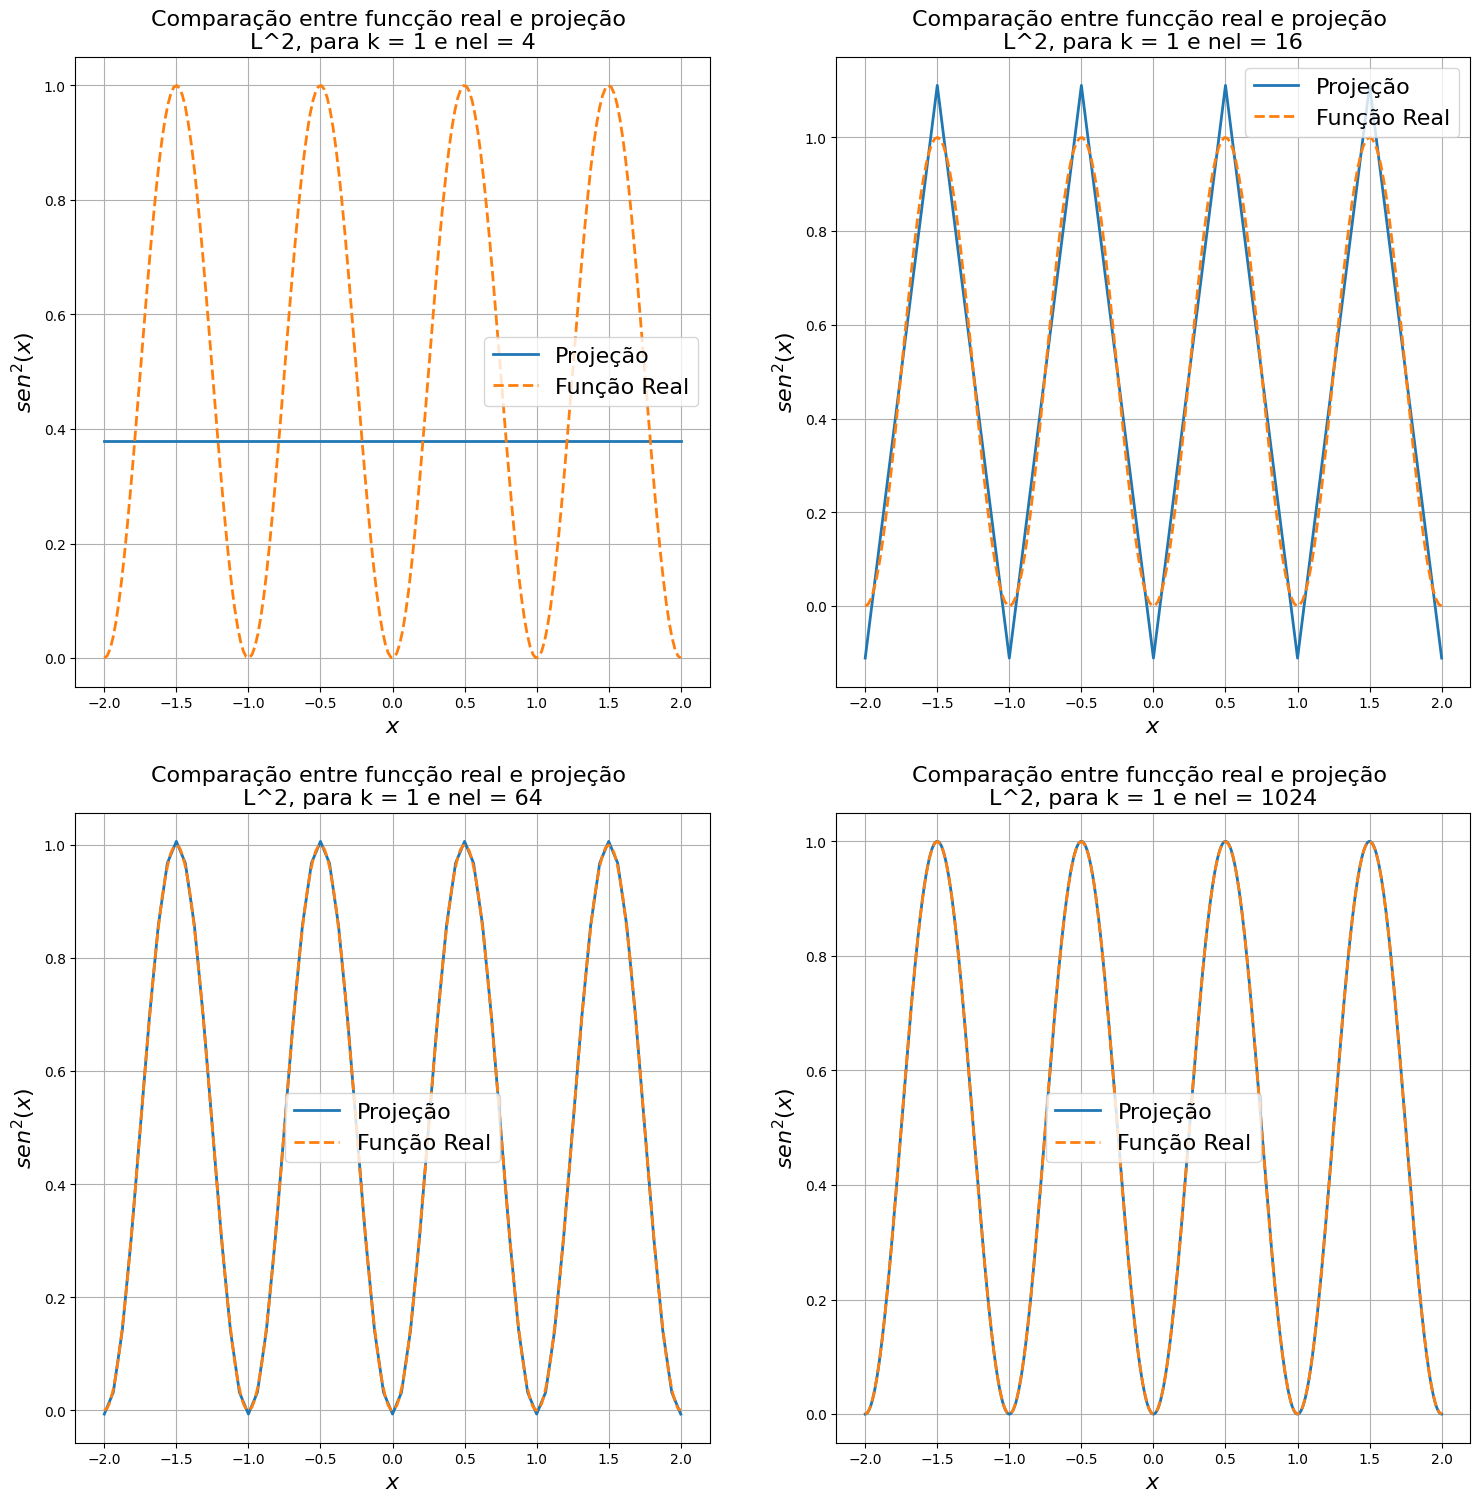

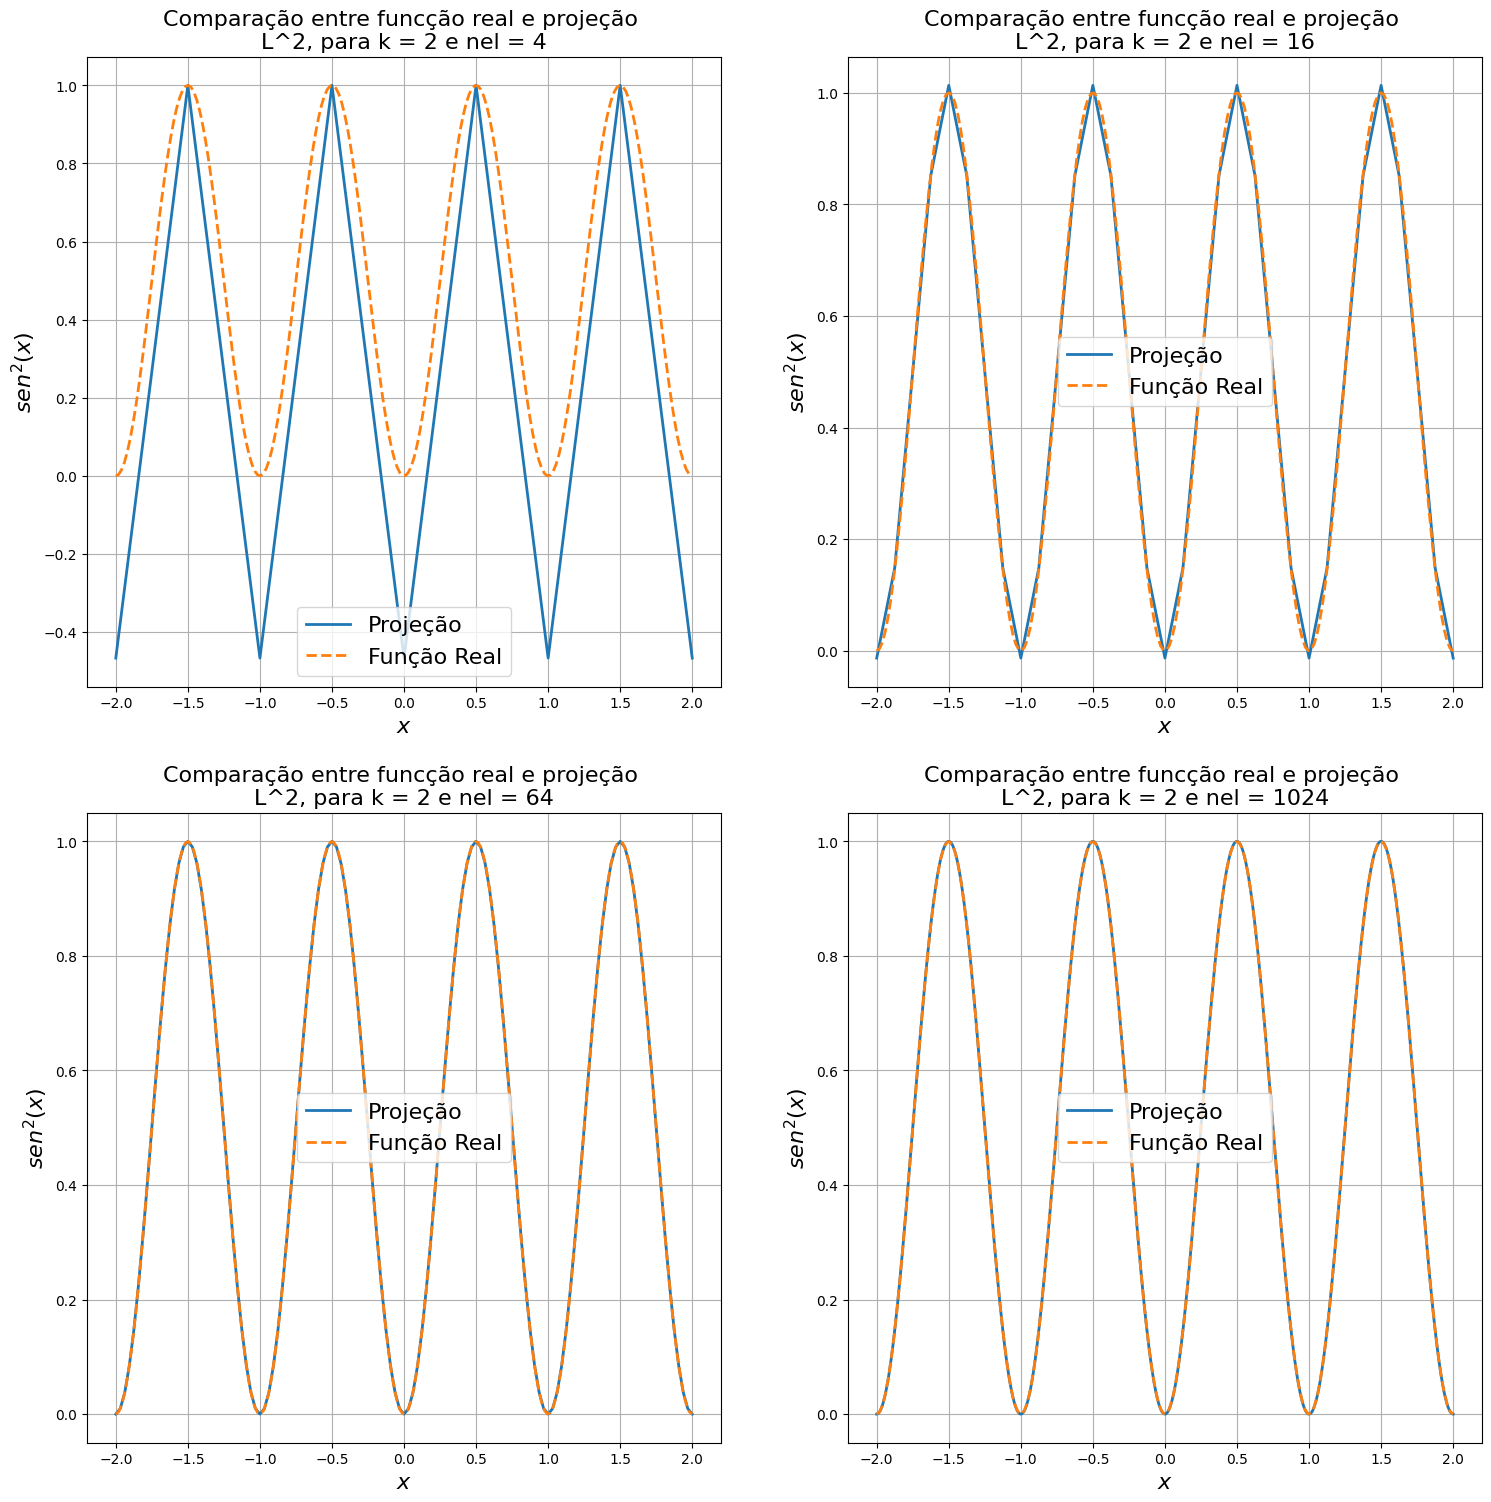

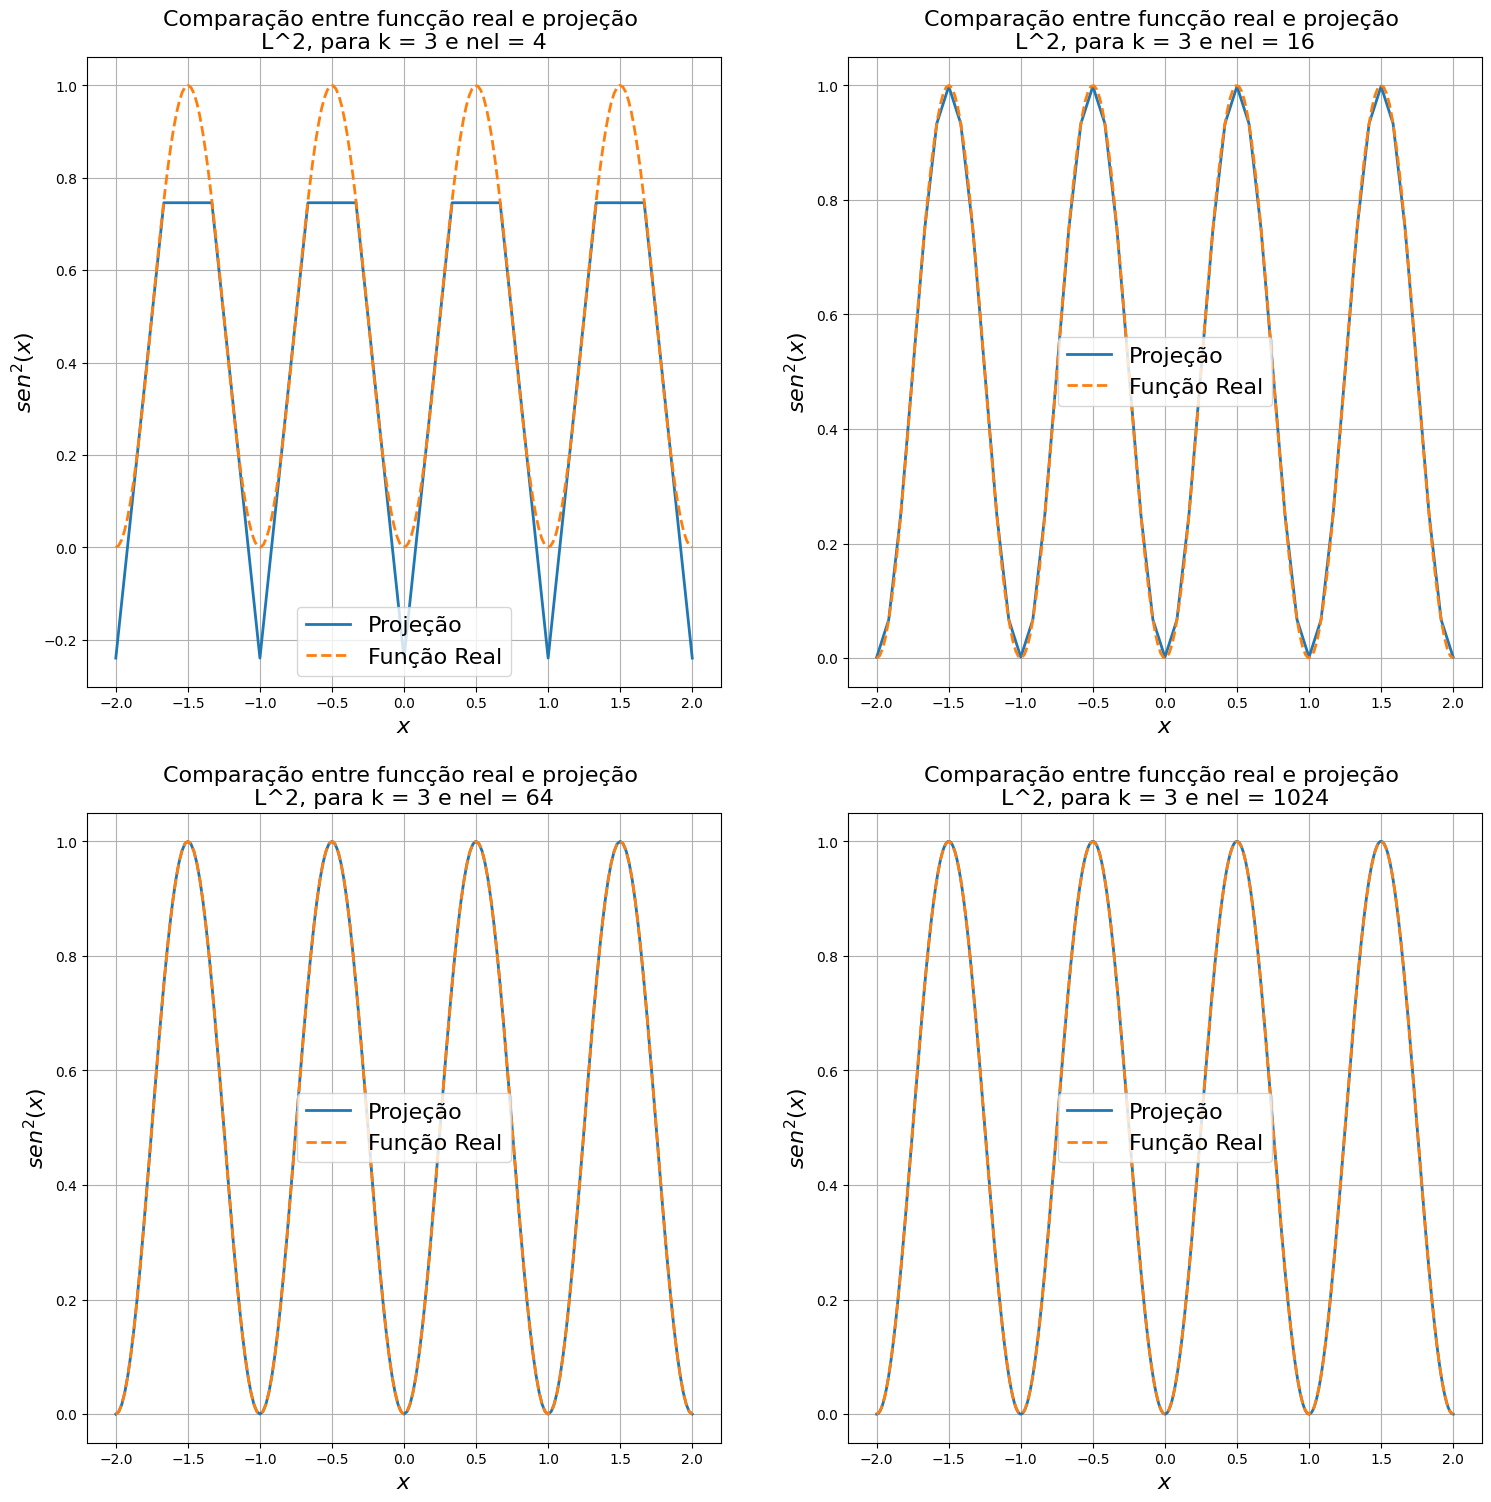

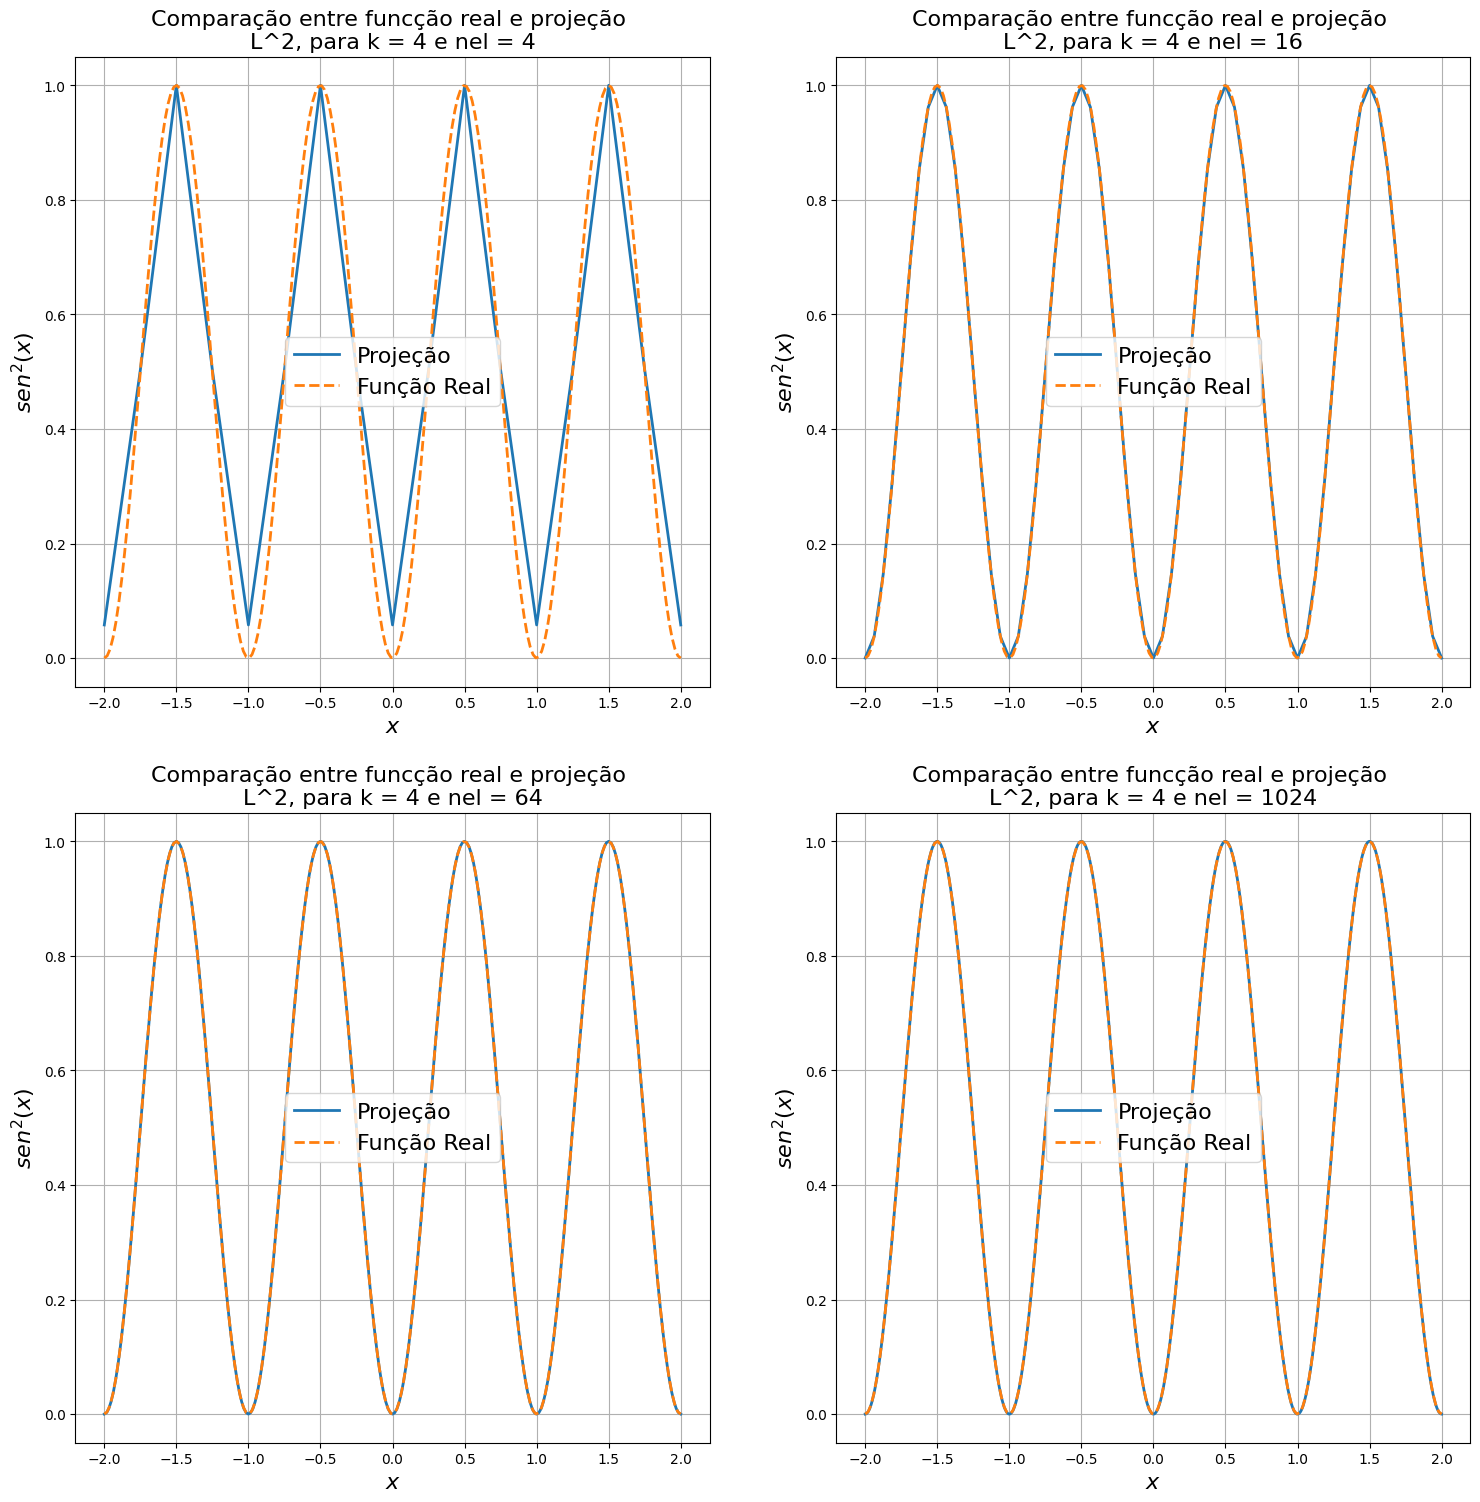

In [160]:
import matplotlib.pyplot as plt

a = -2
b = 2

k_list = [1, 2, 3, 4]

nel_list = [2**2, 2**4, 2**6, 2**10]

size = 2

result_dict = {}

for k in k_list:
    plot_count = 1

    fig = plt.figure(figsize=[size * 9, size * 9])

    result_dict["base_" + str(k)] = {"erro": [], "h": []}

    for nel in nel_list:
        # Realizando a Projeção

        h, xl, alpha = projecaoL2(a, b, nel, k)

        # Calculando o erro
        erro = []

        for i in range(nel + 1):
            erro.append(abs(f(xl[i + i * (k - 1)]) - alpha[i + i * (k - 1)])[0])

        result_dict["base_" + str(k)]["erro"].append(max(erro))
        result_dict["base_" + str(k)]["h"].append(h)

        # Plotando resultados
        ax = fig.add_subplot(2, 2, plot_count)

        ax.set_title(
            "Comparação entre funcção real e projeção \n$L^2$, para k = {} e nel = {}".format(
                k, nel
            ),
            fontsize=16,
        )

        ax.set_ylabel("$sen^2(x)$", fontsize=16)
        ax.set_xlabel("$x$", fontsize=16)

        ax.plot(xl, alpha, linewidth=2, label="Projeção")

        # função real

        x_eval = np.linspace(a, b, num=200)

        ax.plot(x_eval, f(x_eval), linestyle="--", linewidth=2, label="Função Real")

        ax.legend(fontsize=16)

        ax.grid()

        plot_count += 1

    plt.show()

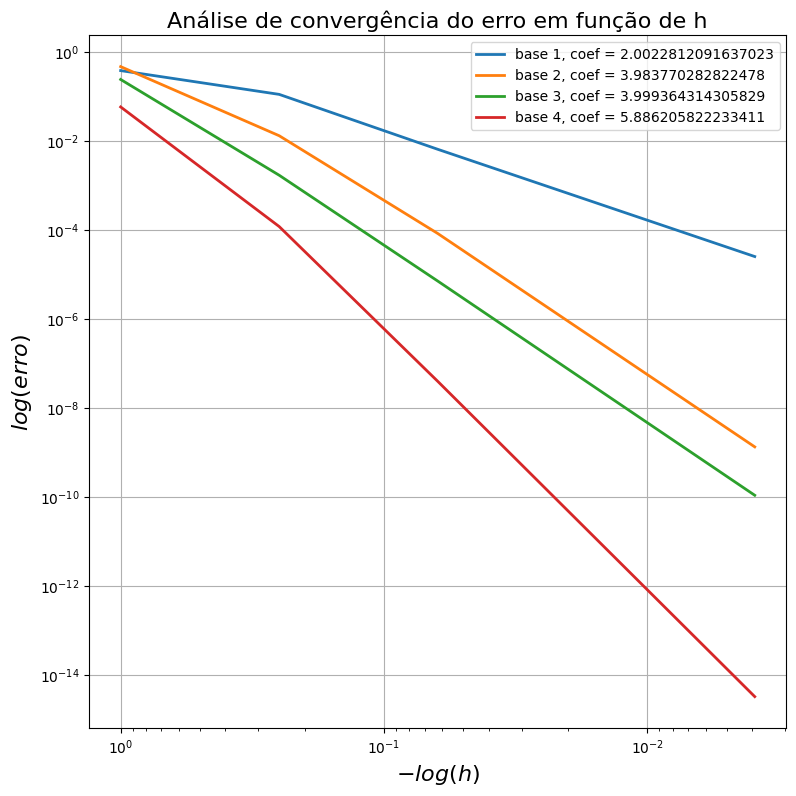

In [158]:
fig = plt.figure(figsize=[9, 9])

# Plotando resultados
ax = fig.add_subplot(1, 1, 1)

ax.set_title(
    "Análise de convergência do erro em função de h".format(k, nel),
    fontsize=16,
)

for k in k_list:
    y1 = np.log10(result_dict["base_{:d}".format(k)]["erro"][-1])
    y2 = np.log10(result_dict["base_{:d}".format(k)]["erro"][-2])

    x1 = np.log10(result_dict["base_{:d}".format(k)]["h"][-1])
    x2 = np.log10(result_dict["base_{:d}".format(k)]["h"][-2])

    coef = (y1-y2) / (x1-x2)

    ax.plot(
        result_dict["base_{:d}".format(k)]["h"],
        result_dict["base_{:d}".format(k)]["erro"],
        linewidth=2,
        label="base {}, coef = {}".format(k,coef)
    )

ax.set_ylabel("$log(erro)$", fontsize=16)
ax.set_xlabel("$-log(h)$", fontsize=16)
ax.invert_xaxis()
ax.set_xscale('log',base=10)
ax.set_yscale('log',base=10)
ax.grid()
ax.legend()

In [184]:
def projecaoL2_disc(a, b, nel, k):
    # # Exemplo
    # # dominio
    # a = -2.0
    # b = 2.0

    # # num de elementos
    # nel = 100
    # # grau do pol. de interp.
    # k = 1

    # inicializando quadratura de gauss
    QG = quadratura(k)

    # num total de nós da malha
    nn = k * nel + 1

    # num de nós do elem.
    nen = k + 1

    # dimensão do elemento
    h = (b - a) / nel

    # vetor de de posições dos nós
    xl = []
    print("base", k)
    print("nel", nel)
    for i in range(nn):
        print("Adicionou: ", i)
        xl.append(a + h * i / k)

        if (i + 1) % (k + 1) == 0:
            print("Adicionou: ", i)

            xl.append(a + h * i / k)

    xl = np.array(xl)

    # matriz global
    alpha_g = []

    # montagem do problema global
    for n in range(nel):
        Me = np.zeros((nen, nen))
        Fe = np.zeros((nen))
        shg = func_base_init(k)

        # calculando matriz de massa local
        for i in range(nen):
            for j in range(nen):
                Me[i, j] = (h / 2) * QG.compute(shg[i + 1], shg[j + 1])

        # Encontrando pontos de integração
        x0 = a + n * h
        x1 = a + (n + 1) * h

        # calculando G(t)
        g_t = f_el_ref(x0, x1)

        # calculando matriz de carga local
        for j in range(nen):
            Fe[j] = (h / 2) * QG.compute(g_t, shg[j + 1])

        # Resolvendo sistema
        alpha = np.linalg.solve(Me, Fe)

        for point in alpha:
            alpha_g.append(point)

    return h, xl, alpha_g

In [185]:
import matplotlib.pyplot as plt

a = -2
b = 2

k_list = [1, 2, 3, 4]

# nel_list = [2**2, 2**4, 2**6, 2**10]
nel_list = [2**2]

size = 2

result_dict = {}

for k in k_list:
    plot_count = 1

    # fig = plt.figure(figsize=[size * 9, size * 9])

    result_dict["base_" + str(k)] = {"erro": [], "h": []}

    for nel in nel_list:
        # Realizando a Projeção

        h, xl, alpha = projecaoL2_disc(a, b, nel, k)

        # Calculando o erro
        # erro = []

        # for i in range(nel + 1):
        #     erro.append(abs(f(xl[i + i * (k - 1)]) - alpha[i + i * (k - 1)])[0])

        result_dict["base_" + str(k)]["erro"].append(0)
        result_dict["base_" + str(k)]["h"].append(h)

        # Plotando resultados
        # ax = fig.add_subplot(2, 2, plot_count)

        # ax.set_title(
        #     "Comparação entre funcção real e projeção \n$L^2$, para k = {} e nel = {}".format(
        #         k, nel
        #     ),
        #     fontsize=16,
        # )

        # ax.set_ylabel("$sen^2(x)$", fontsize=16)
        # ax.set_xlabel("$x$", fontsize=16)

        # ax.plot(xl, alpha, linewidth=2, label="Projeção")

        # # função real

        # x_eval = np.linspace(a, b, num=200)

        # ax.plot(x_eval, f(x_eval), linestyle="--", linewidth=2, label="Função Real")

        # ax.legend(fontsize=16)

        # ax.grid()

        # plot_count += 1

    # plt.show()

base 1
nel 4
Adicionou:  0
Adicionou:  1
Adicionou:  1
Adicionou:  2
Adicionou:  3
Adicionou:  3
Adicionou:  4
base 2
nel 4
Adicionou:  0
Adicionou:  1
Adicionou:  2
Adicionou:  2
Adicionou:  3
Adicionou:  4
Adicionou:  5
Adicionou:  5
Adicionou:  6
Adicionou:  7
Adicionou:  8
Adicionou:  8
base 3
nel 4
Adicionou:  0
Adicionou:  1
Adicionou:  2
Adicionou:  3
Adicionou:  3
Adicionou:  4
Adicionou:  5
Adicionou:  6
Adicionou:  7
Adicionou:  7
Adicionou:  8
Adicionou:  9
Adicionou:  10
Adicionou:  11
Adicionou:  11
Adicionou:  12
base 4
nel 4
Adicionou:  0
Adicionou:  1
Adicionou:  2
Adicionou:  3
Adicionou:  4
Adicionou:  4
Adicionou:  5
Adicionou:  6
Adicionou:  7
Adicionou:  8
Adicionou:  9
Adicionou:  9
Adicionou:  10
Adicionou:  11
Adicionou:  12
Adicionou:  13
Adicionou:  14
Adicionou:  14
Adicionou:  15
Adicionou:  16
